In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt

##timeframe = input("ingresar timeframe (1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo): ")
timeframe = "1h"

## if timeframe == "1m" or timeframe == "2m" or timeframe == "5m":
##    fecha = dt.date.today() - dt.timedelta(days=7)
##elif timeframe == "15m" or timeframe == "30m" or timeframe == "60m" or timeframe == "90m" or timeframe == "1h":
##    fecha = dt.date.today() - dt.timedelta(days=59)
##else:
##    fecha= dt.date.today() - dt.timedelta(days=700)

##ticker = yf.download("GGAL", start = "2020-08-04", end = "2020-08-12", interval=timeframe,)
ticker = yf.download("GGAL", start = "2020-07-20", end = "2020-08-03", interval=timeframe,)

ticker

[*********************100%***********************]  1 of 1 completed


Open    High      Low    Close  Adj Close  Volume
Date                                                            
2020-07-20  11.0750  11.380  10.8050  10.9800    10.9800  229470
2020-07-20  10.9900  11.140  10.9700  11.0400    11.0400   77248
2020-07-20  11.0490  11.170  11.0400  11.1071    11.1071   63494
2020-07-20  11.1150  11.115  10.9150  10.9250    10.9250   93043
2020-07-20  10.9300  10.940  10.8200  10.8650    10.8650  190683
...             ...     ...      ...      ...        ...     ...
2020-07-31  12.1600  12.160  12.0600  12.1400    12.1400   46853
2020-07-31  12.1500  12.150  11.9313  12.0200    12.0200   49979
2020-07-31  12.0250  12.060  11.9400  12.0550    12.0550   76230
2020-07-31  12.0550  12.060  11.8500  11.9100    11.9100   93314
2020-07-31  11.9187  12.010  11.9000  12.0000    12.0000  161589

[70 rows x 6 columns]

In [2]:
data = ticker
data

Open    High      Low    Close  Adj Close  Volume
Date                                                            
2020-07-20  11.0750  11.380  10.8050  10.9800    10.9800  229470
2020-07-20  10.9900  11.140  10.9700  11.0400    11.0400   77248
2020-07-20  11.0490  11.170  11.0400  11.1071    11.1071   63494
2020-07-20  11.1150  11.115  10.9150  10.9250    10.9250   93043
2020-07-20  10.9300  10.940  10.8200  10.8650    10.8650  190683
...             ...     ...      ...      ...        ...     ...
2020-07-31  12.1600  12.160  12.0600  12.1400    12.1400   46853
2020-07-31  12.1500  12.150  11.9313  12.0200    12.0200   49979
2020-07-31  12.0250  12.060  11.9400  12.0550    12.0550   76230
2020-07-31  12.0550  12.060  11.8500  11.9100    11.9100   93314
2020-07-31  11.9187  12.010  11.9000  12.0000    12.0000  161589

[70 rows x 6 columns]

In [3]:
data['segmento'] = round(data['Close'], 1)
data = pd.concat([data['segmento'], data['Volume']], axis=1)
data

segmento  Volume
Date                        
2020-07-20      11.0  229470
2020-07-20      11.0   77248
2020-07-20      11.1   63494
2020-07-20      10.9   93043
2020-07-20      10.9  190683
...              ...     ...
2020-07-31      12.1   46853
2020-07-31      12.0   49979
2020-07-31      12.1   76230
2020-07-31      11.9   93314
2020-07-31      12.0  161589

[70 rows x 2 columns]

In [4]:
grupo = data.groupby('segmento')

for segmento, segmento_df in grupo:
    print('Segmento [', segmento, ']')
    print(segmento_df)
    

Segmento [ 10.9 ]
            segmento  Volume
Date                        
2020-07-20      10.9   93043
2020-07-20      10.9  190683
2020-07-20      10.9  253707
2020-07-20      10.9  182932
Segmento [ 11.0 ]
            segmento  Volume
Date                        
2020-07-20      11.0  229470
2020-07-20      11.0   77248
2020-07-21      11.0  574358
Segmento [ 11.1 ]
            segmento  Volume
Date                        
2020-07-20      11.1   63494
Segmento [ 11.3 ]
            segmento  Volume
Date                        
2020-07-21      11.3  299776
2020-07-21      11.3  194273
2020-07-22      11.3  165995
Segmento [ 11.4 ]
            segmento  Volume
Date                        
2020-07-21      11.4  416952
2020-07-21      11.4  230405
Segmento [ 11.5 ]
            segmento  Volume
Date                        
2020-07-21      11.5  257551
Segmento [ 11.6 ]
            segmento  Volume
Date                        
2020-07-21      11.6  393005
2020-07-22      11.6  220572
Segm

In [5]:
perfil = grupo.sum()
perfil

Volume
segmento         
10.9       720365
11.0       881076
11.1        63494
11.3       660044
11.4       647357
11.5       257551
11.6       613577
11.8       224524
11.9       842797
12.0       681142
12.1       914646
12.2       764099
12.3      1037544
12.4       660916
12.5       769548
12.6        80454
12.7       982448
12.8      1407045
12.9       490849
13.0       417602

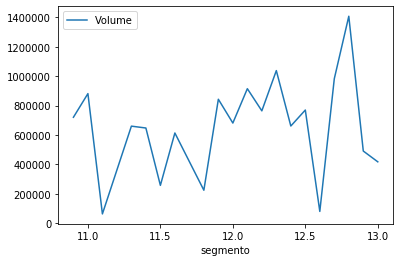

In [6]:
perfil.plot()